<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Base-case" data-toc-modified-id="Base-case-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Base case</a></span></li><li><span><a href="#Base-model" data-toc-modified-id="Base-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Mean-encoding" data-toc-modified-id="Mean-encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mean encoding</a></span></li><li><span><a href="#Convergence-to-minimum-comparison-by-SHAP-vs-VIF" data-toc-modified-id="Convergence-to-minimum-comparison-by-SHAP-vs-VIF-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Convergence to minimum comparison by SHAP vs VIF</a></span></li></ul></div>

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import log_loss
pd.options.display.max_rows=300

params = {
    "max_depth":-1,
    "learning_rate":.01,
    "n_estimators":1000,
    "objective":"binary",
    "device":"gpu",
    "random_state":42
}

lgb = LGBMClassifier(**params)

train_ = pd.read_pickle("./train_115.pkl")
x = train_.date.dt.year
train = train_[x<=2012]
test = train_[((2012<x)&(x<=2015))]

y_train = train["target"]
X_train = train.drop("target",1)
y_test = test["target"]
X_test = test.drop("target",1)

train.columns

Index(['date', 'idx', 'f__buytransactions_1m', 'f__selltransactions_1m',
       'f__buyshares_1m', 'f__sellshares_1m', 'f__buysharespctsharesout_1m',
       'f__sellsharespctsharesout_1m', 'f__uniquebuyers_1m',
       'f__uniquesellers_1m', 'f__buytransactions_3m',
       'f__selltransactions_3m', 'f__buyshares_3m', 'f__sellshares_3m',
       'f__buysharespctsharesout_3m', 'f__sellsharespctsharesout_3m',
       'f__uniquebuyers_3m', 'f__uniquesellers_3m', 'f__buytransactions_6m',
       'f__selltransactions_6m', 'f__buyshares_6m', 'f__sellshares_6m',
       'f__buysharespctsharesout_6m', 'f__sellsharespctsharesout_6m',
       'f__uniquebuyers_6m', 'f__uniquesellers_6m', 'f__buytransactions_12m',
       'f__selltransactions_12m', 'f__buyshares_12m', 'f__sellshares_12m',
       'f__buysharespctsharesout_12m', 'f__sellsharespctsharesout_12m',
       'f__uniquebuyers_12m', 'f__uniquesellers_12m', 'target', 'cnt'],
      dtype='object')

# Base case

In [16]:
log_loss(y_train,np.ones_like(y_train)/2)

0.693147180559946

# Base model

In [17]:
num_cols = X_train.select_dtypes(include="number").columns
lgb.fit(X_train[num_cols], y_train)
log_loss(y_train, lgb.predict_proba(X_train[num_cols]))
#0.6458755547393696
#0.6458558605997866
#0.6459021807097592

0.6458881243302501

# Feature engineering

1. Dates  

2. buytrans minus selltrans:
    - 1M
    - 3M
    - 6M
    - 12M

3. buyshares plus sellshares (**sellshares are negative!!!**):
    - 1M
    - 3M
    - 6M
    - 12M

4. uniqubuyers minus uniquesellers:
    - 1M
    - 3M
    - 6M
    - 12M

5. buysharespctsharesout plus sellsharespctsharesout (**sellshares are negative!!!**):
    - 1M
    - 3M
    - 6M
    - 12M

6. buytrans 1m minus:
    - 3M
    - 6M
    - 12M

7. selltrans 1m minus:
    - 3M
    - 6M
    - 12M

8. buyshares 1M minus:
    - 3M
    - 6M
    - 12M

9. sellshares 1M minus:
    - 3M
    - 6M
    - 12M

10. unique buyers 1M minus:
    - 3M
    - 6M
    - 12M

12. unique sellers 1M minus:
    - 3M
    - 6M
    - 12M

13. buysharespctsharesout 1M minus:
    - 3M
    - 6M
    - 12M

14. sellsharespctsharesout 1M minus:
    - 3M
    - 6M
    - 12M

In [18]:
def add_date(df):
    df["year"] = df["date"].dt.year.astype("int32")
    df["month"] = df["date"].dt.month.astype("int32")
    df["quarter"] = df["date"].dt.quarter.astype("int32")
    df["week"] = df["date"].dt.isocalendar().week.astype("int32")
    df["day"] = df["date"].dt.dayofyear.astype("int32")
    df.drop("date", axis=1, inplace=True)
    df["btrs_strs_1m"] = df["f__buytransactions_1m"] - df["f__selltransactions_1m"]
    df["btrs_strs_3m"] = df["f__buytransactions_3m"] - df["f__selltransactions_3m"]
    df["btrs_strs_6m"] = df["f__buytransactions_6m"] - df["f__selltransactions_6m"]
    df["btrs_strs_12m"] = df["f__buytransactions_12m"] - df["f__selltransactions_12m"]
    df["bshrs_sshrs_1m"] = df["f__buyshares_1m"] - df["f__sellshares_1m"]
    df["bshrs_sshrs_3m"] = df["f__buyshares_3m"] - df["f__sellshares_3m"]
    df["bshrs_sshrs_6m"] = df["f__buyshares_6m"] - df["f__sellshares_6m"]
    df["bshrs_sshrs_12m"] = df["f__buyshares_12m"] - df["f__sellshares_12m"]
#############45
    df["unqb_unqs_1m"] = df["f__uniquebuyers_1m"] - df["f__uniquesellers_1m"]
    df["unqb_unqs_3m"] = df["f__uniquebuyers_3m"] - df["f__uniquesellers_3m"]
    df["unqb_unqs_6m"] = df["f__uniquebuyers_6m"] - df["f__uniquesellers_6m"]
    df["unqb_unqs_12m"] = df["f__uniquebuyers_12m"] - df["f__uniquesellers_12m"]
    df["bpct_spct_1m"] = (
        df["f__buysharespctsharesout_1m"] + df["f__sellsharespctsharesout_1m"]
    )
    df["bpct_spct_3m"] = (
        df["f__buysharespctsharesout_3m"] + df["f__sellsharespctsharesout_3m"]
    )
    df["bpct_spct_6m"] = (
        df["f__buysharespctsharesout_6m"] + df["f__sellsharespctsharesout_6m"]
    )
    df["bpct_spct_12m"] = (
        df["f__buysharespctsharesout_12m"] + df["f__sellsharespctsharesout_12m"]
    )
#############
    df['btrs1m_btrs3m'] = df["f__buytransactions_1m"] - df["f__buytransactions_3m"]
    df['btrs1m_btrs6m'] = df["f__buytransactions_1m"] - df["f__buytransactions_6m"]
    df['btrs1m_btrs12m'] = df["f__buytransactions_1m"] - df["f__buytransactions_12m"]
    df['strs1m_strs3m'] = df["f__selltransactions_1m"] - df["f__selltransactions_3m"]
    df['strs1m_strs6m'] = df["f__selltransactions_1m"] - df["f__selltransactions_6m"]
#############60
    df['strs1m_strs12m'] = df["f__selltransactions_1m"] - df["f__selltransactions_12m"]
    df['bsrs1m_bshrs3m'] = df["f__buyshares_1m"] - df["f__buyshares_3m"]
    df['bsrs1m_bshrs6m'] = df["f__buyshares_1m"] - df["f__buyshares_6m"]
    df['bsrs1m_bshrs12m'] = df["f__buyshares_1m"] - df["f__buyshares_12m"]
    df['sshrs1m_sshrs3m'] = df["f__sellshares_1m"] - df["f__sellshares_3m"]
    df['sshrs1m_sshrs6m'] = df["f__sellshares_1m"] - df["f__sellshares_6m"]
    df['sshrs1m_sshrs12m'] = df["f__sellshares_1m"] - df["f__sellshares_12m"]
    df['unqb1m_unqb3m'] = df['f__uniquebuyers_1m'] - df['f__uniquebuyers_3m'] 
    df['unqb1m_unqb6m'] = df['f__uniquebuyers_1m'] - df['f__uniquebuyers_6m']
    df['unqb1m_unqb12m'] = df['f__uniquebuyers_1m'] - df['f__uniquebuyers_12m'] 
    df['unqs1m_unqs3m'] = df["f__uniquesellers_1m"] - df["f__uniquesellers_3m"]
    df['unqs1m_unqs6m'] = df["f__uniquesellers_1m"] - df["f__uniquesellers_6m"]
    df['unqs1m_unqs12m'] = df["f__uniquesellers_1m"] - df["f__uniquesellers_12m"]
    df["bpct1m_bpct3m"] = df["f__buysharespctsharesout_1m"] - df["f__buysharespctsharesout_3m"]
    df["bpct1m_bpct6m"] = df["f__buysharespctsharesout_1m"] - df["f__buysharespctsharesout_6m"]
    df["bpct1m_bpct12m"] = df["f__buysharespctsharesout_1m"] - df["f__buysharespctsharesout_12m"]
    df["spct1m_spct3m"] = df["f__sellsharespctsharesout_1m"] - df["f__sellsharespctsharesout_3m"]
    df["spct1m_spct6m"] = df["f__sellsharespctsharesout_1m"] - df["f__sellsharespctsharesout_6m"]
    df["spct1m_spct12m"] = df["f__sellsharespctsharesout_1m"] - df["f__sellsharespctsharesout_12m"]

add_date(X_train)
add_date(X_test)

### Choose num of features: 45,55,60
# num_cols = X_train.select_dtypes(include="number").columns[:45]

# LightGBM employes a peculiar [strategy](https://datascience.stackexchange.com/questions/65956/how-do-gbm-algorithms-handle-missing-data)  to handle missing values. Imputing missing values will make it worse:

lgb.fit(X_train, y_train)
log_loss(y_train, lgb.predict_proba(X_train))
# 0.6445713097267892
# 0.6446687021689067
# 0.6445713109503719
# 0.6447565903932139
# 0.6446061969954247

0.6449726159347476

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


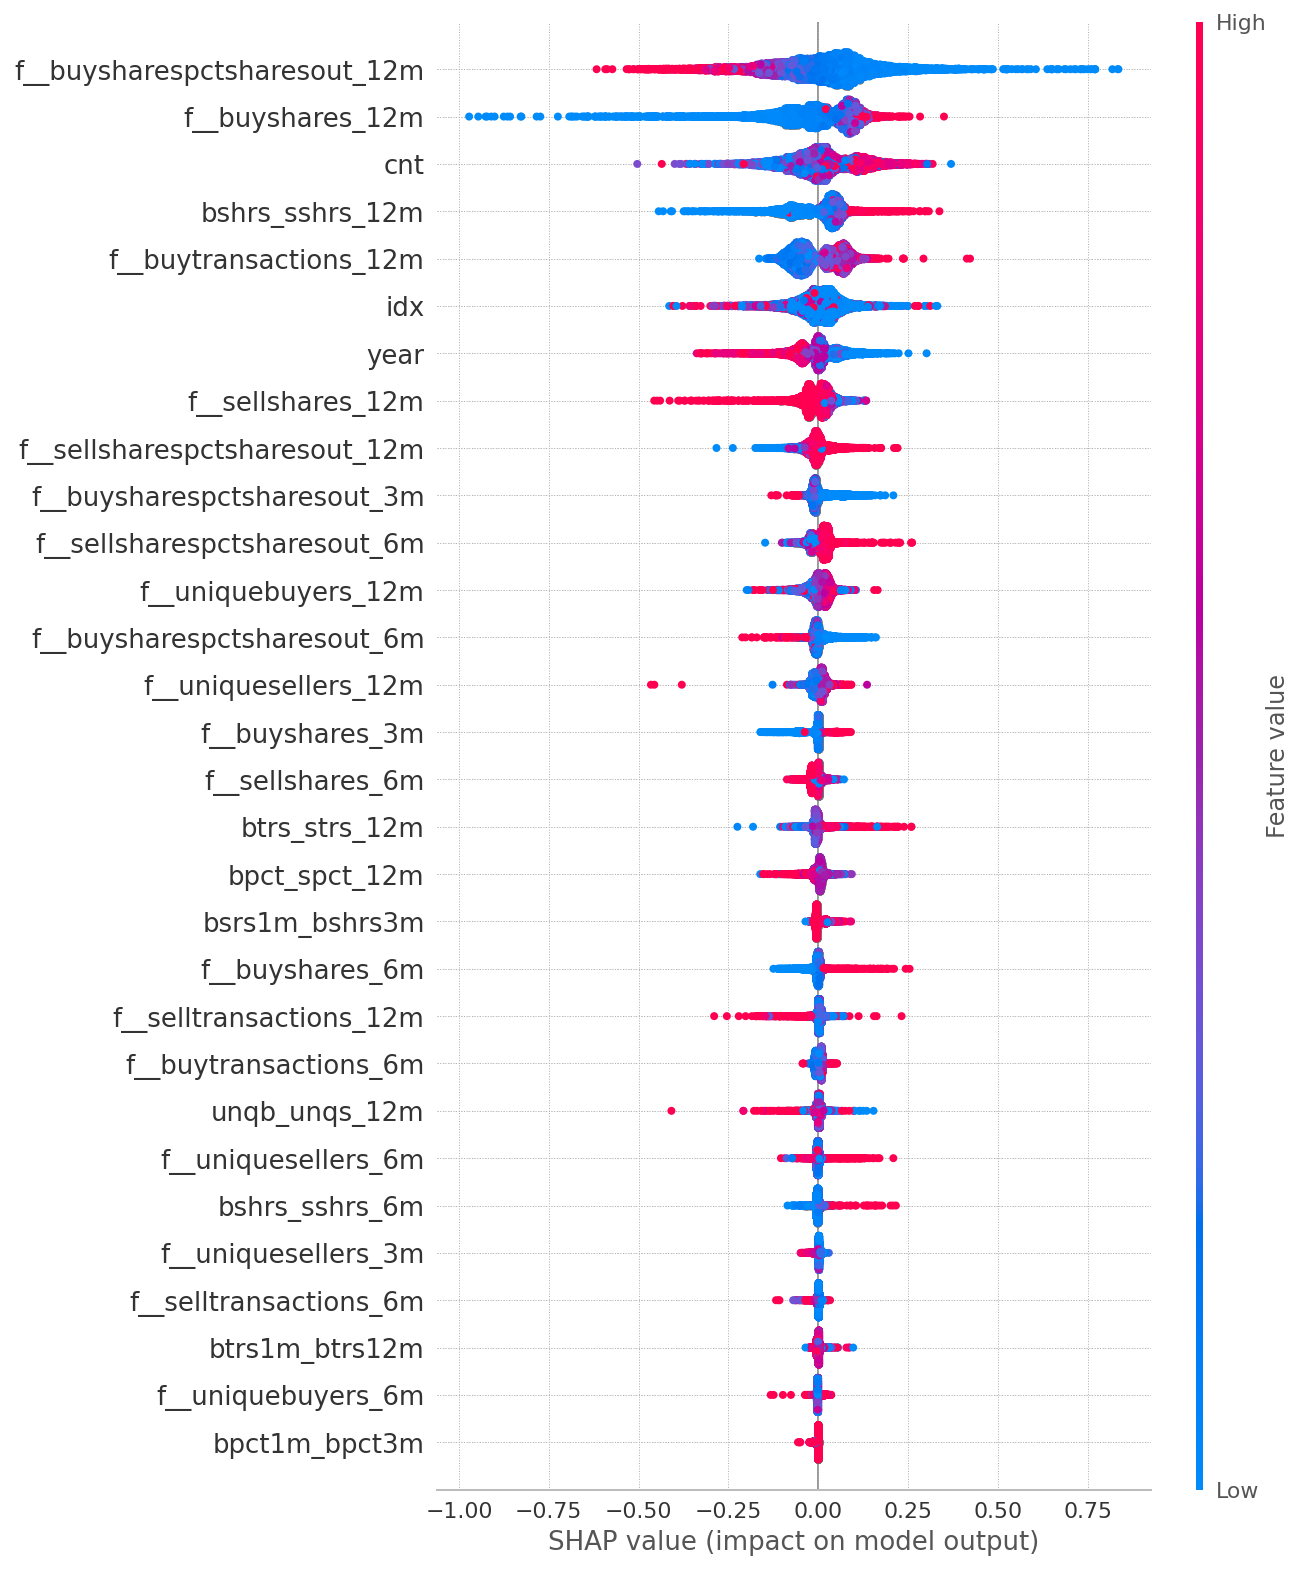

In [19]:
import shap
x = X_train.sample(frac=.01)
from shap import TreeExplainer, summary_plot
explainer = TreeExplainer(lgb)
sv = explainer.shap_values(x)
summary_plot(sv[1],x, max_display=30)

# Mean encoding

In [20]:
def enc(arr, period, shift=52):
    return arr[-shift - period : -shift].mean()

for period in [4,12,24,52]:
    name = "tme"+ str(period)
    X_train[name] = (
        X_train.
        assign(target=y_train.values).
        groupby("idx").
        expanding().
        agg({"target": lambda arr: enc(arr, period)}).
        fillna(0).
        values
    )

In [21]:
X_train.columns

Index(['idx', 'f__buytransactions_1m', 'f__selltransactions_1m',
       'f__buyshares_1m', 'f__sellshares_1m', 'f__buysharespctsharesout_1m',
       'f__sellsharespctsharesout_1m', 'f__uniquebuyers_1m',
       'f__uniquesellers_1m', 'f__buytransactions_3m',
       'f__selltransactions_3m', 'f__buyshares_3m', 'f__sellshares_3m',
       'f__buysharespctsharesout_3m', 'f__sellsharespctsharesout_3m',
       'f__uniquebuyers_3m', 'f__uniquesellers_3m', 'f__buytransactions_6m',
       'f__selltransactions_6m', 'f__buyshares_6m', 'f__sellshares_6m',
       'f__buysharespctsharesout_6m', 'f__sellsharespctsharesout_6m',
       'f__uniquebuyers_6m', 'f__uniquesellers_6m', 'f__buytransactions_12m',
       'f__selltransactions_12m', 'f__buyshares_12m', 'f__sellshares_12m',
       'f__buysharespctsharesout_12m', 'f__sellsharespctsharesout_12m',
       'f__uniquebuyers_12m', 'f__uniquesellers_12m', 'cnt', 'year', 'month',
       'quarter', 'week', 'day', 'btrs_strs_1m', 'btrs_strs_3m',
       'btrs_

In [22]:
lgb.fit(X_train,y_train)
log_loss(y_train, lgb.predict_proba(X_train))
#0.6409620312279963
#0.6409065699506119
#0.6409065656153017

0.6409065913903961

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


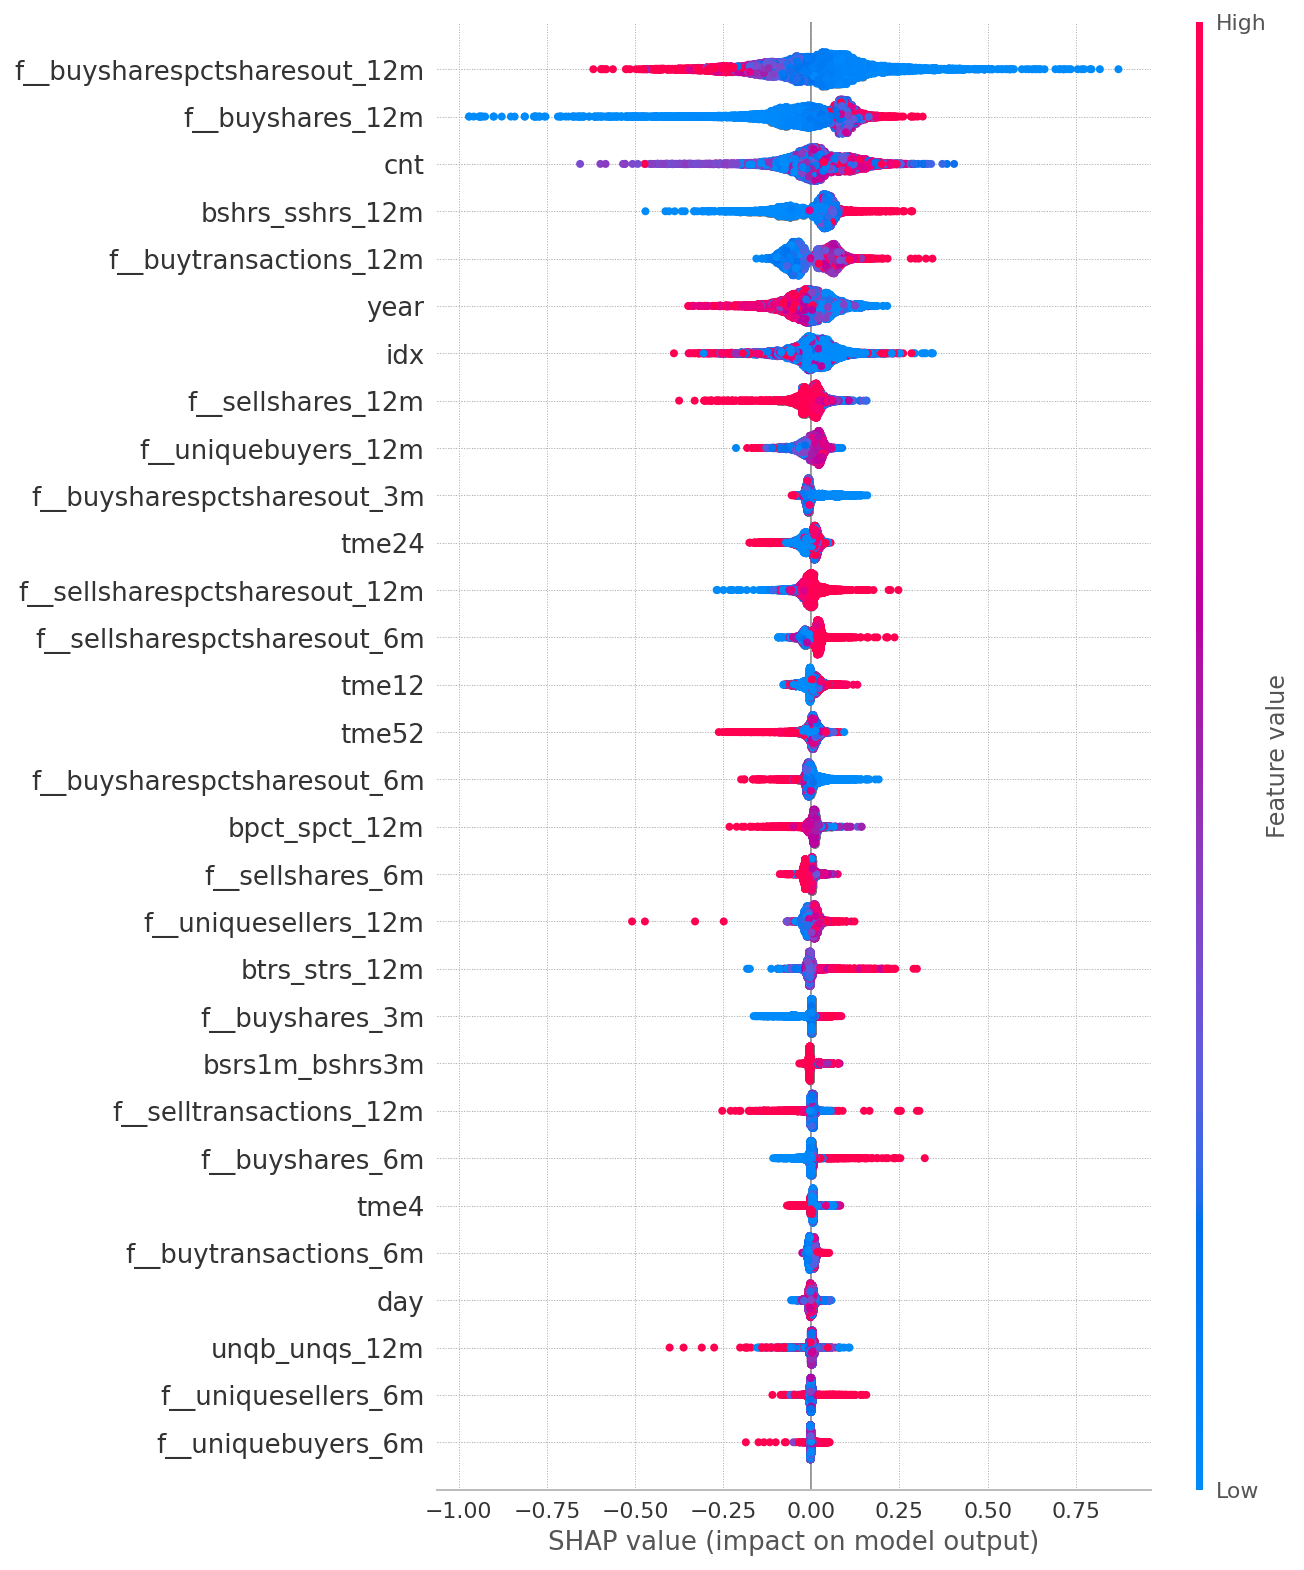

In [23]:
from shap import TreeExplainer
x = X_train.sample(frac=.01)
explainer = TreeExplainer(lgb)
sv = explainer.shap_values(x)
summary_plot(sv[1],x, max_display=30)

# Convergence to minimum comparison by SHAP vs VIF

In [24]:
x = X_train.copy()
sv_cols = x.columns[np.abs(sv[1]).mean(0).argsort()[::-1]]
print("Total cols:",len(sv_cols))
print(sv_cols)
min_ll = 1
ll_shap = []
counter = 0
early_stopping = 10
for i in tqdm(range(len(sv_cols))):
    lgb.fit(X_train[sv_cols[:i]], y_train)
    ll = log_loss(y_train, lgb.predict_proba(X_train[sv_cols[:i]]))
    ll_shap.append(ll)
    counter += 1
    if ll < min_ll:
        counter = 0 
        print("Num cols:",i, "Log loss:", ll)
        min_ll = ll
    if counter > early_stopping:
        print("Early stopping occurred at", i, "after", early_stopping)
        break
# Num cols: 0 Log loss: 0.6913303488918437
# Num cols: 1 Log loss: 0.6874024256925048
# Num cols: 2 Log loss: 0.6714152057770137
# Num cols: 3 Log loss: 0.6649484299115408
# Num cols: 4 Log loss: 0.6618753383059895
# Num cols: 5 Log loss: 0.6583092860635188
# Num cols: 6 Log loss: 0.6557385041090065
# Num cols: 7 Log loss: 0.6471622386625937
# Num cols: 8 Log loss: 0.6462586029837042
# Num cols: 9 Log loss: 0.6459068734145889
# Num cols: 10 Log loss: 0.6458257286623672
# Num cols: 11 Log loss: 0.6428947365933522
# Num cols: 13 Log loss: 0.6422927536949523
# Num cols: 14 Log loss: 0.6419672528393768
# Num cols: 18 Log loss: 0.6417894447454549
# Num cols: 19 Log loss: 0.6416939068929575
# Num cols: 20 Log loss: 0.6416179249894859
# Num cols: 21 Log loss: 0.6405877688009319
# Num cols: 22 Log loss: 0.6405321854672318
# Num cols: 23 Log loss: 0.6405152535877722
# Num cols: 24 Log loss: 0.6404172973000068
# Num cols: 25 Log loss: 0.6402236984840831
# Num cols: 27 Log loss: 0.6400711906381928
# Num cols: 28 Log loss: 0.6400368952169988

Total cols: 83
Index(['f__buysharespctsharesout_12m', 'f__buyshares_12m', 'cnt',
       'bshrs_sshrs_12m', 'f__buytransactions_12m', 'year', 'idx',
       'f__sellshares_12m', 'f__uniquebuyers_12m',
       'f__buysharespctsharesout_3m', 'tme24', 'f__sellsharespctsharesout_12m',
       'f__sellsharespctsharesout_6m', 'tme12', 'tme52',
       'f__buysharespctsharesout_6m', 'bpct_spct_12m', 'f__sellshares_6m',
       'f__uniquesellers_12m', 'btrs_strs_12m', 'f__buyshares_3m',
       'bsrs1m_bshrs3m', 'f__selltransactions_12m', 'f__buyshares_6m', 'tme4',
       'f__buytransactions_6m', 'day', 'unqb_unqs_12m', 'f__uniquesellers_6m',
       'f__uniquebuyers_6m', 'f__uniquesellers_3m', 'bpct_spct_6m',
       'bpct1m_bpct3m', 'btrs1m_btrs12m', 'sshrs1m_sshrs12m',
       'f__sellshares_3m', 'btrs_strs_3m', 'unqb_unqs_3m', 'btrs_strs_6m',
       'unqs1m_unqs12m', 'bshrs_sshrs_6m', 'unqb_unqs_1m', 'strs1m_strs12m',
       'bpct_spct_3m', 'spct1m_spct12m', 'f__selltransactions_6m',
       'unqb1m_

  0%|          | 0/83 [00:00<?, ?it/s]

Num cols: 0 Log loss: 0.6913303488918437
Num cols: 1 Log loss: 0.6874020402190826
Num cols: 2 Log loss: 0.6714209904267194
Num cols: 3 Log loss: 0.6649484294033582
Num cols: 4 Log loss: 0.6618576066442468
Num cols: 5 Log loss: 0.6583046496641978
Num cols: 6 Log loss: 0.6557610080694379
Num cols: 7 Log loss: 0.6472063299350984
Num cols: 8 Log loss: 0.6462586057698925
Num cols: 9 Log loss: 0.6459084111818427
Num cols: 10 Log loss: 0.6458257278328093
Num cols: 11 Log loss: 0.642873247154552
Num cols: 12 Log loss: 0.6424760574180436
Num cols: 13 Log loss: 0.6424008012890903
Num cols: 14 Log loss: 0.6419531528692607
Num cols: 17 Log loss: 0.641800097135478
Num cols: 18 Log loss: 0.6417826723582306
Num cols: 19 Log loss: 0.6417199125256883
Num cols: 20 Log loss: 0.640614519601153
Num cols: 21 Log loss: 0.6405847521851723
Num cols: 22 Log loss: 0.6405322536406788
Num cols: 23 Log loss: 0.6404108187497553
Num cols: 25 Log loss: 0.640223698796296
Num cols: 27 Log loss: 0.6400711907756717
Num co

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x = X_train.fillna(0)
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns
X = add_constant(x)

vif_data["VIF"] = [
    variance_inflation_factor(x.values, i) for i in range(x.shape[1])
]

In [26]:
vif_cols = vif_data.sort_values("VIF")["feature"].values
print("Total cols:", len(vif_cols))
print(vif_cols)
# get NaNs back
x = X_train
ll_vif = []
min_ll = 1
for i in tqdm(range(len(vif_cols))):
    lgb.fit(X_train[vif_cols[:i]], y_train)
    ll = log_loss(y_train, lgb.predict_proba(X_train[vif_cols[:i]]))
    ll_vif.append(ll)
    if ll < min_ll:
        print("Num cols:", i, "LogLoss:",ll)
        min_ll = ll
        
# Num cols: 0 LogLoss: 0.6913303488918437
# Num cols: 1 LogLoss: 0.6911297240869786
# Num cols: 2 LogLoss: 0.6762960659087693
# Num cols: 3 LogLoss: 0.6697771005567165
# Num cols: 4 LogLoss: 0.6691356135355222
# Num cols: 5 LogLoss: 0.6689495123473996
# Num cols: 6 LogLoss: 0.6685438967643289
# Num cols: 7 LogLoss: 0.6678025121295503
# Num cols: 8 LogLoss: 0.6655782055139671
# Num cols: 9 LogLoss: 0.6619869377766102
# Num cols: 11 LogLoss: 0.6617412369733555
# Num cols: 12 LogLoss: 0.6597161128233213
# Num cols: 13 LogLoss: 0.6596482488684563
# Num cols: 15 LogLoss: 0.6592837214078477
# Num cols: 16 LogLoss: 0.6591960717068397
# Num cols: 17 LogLoss: 0.658763275568631
# Num cols: 18 LogLoss: 0.6575439346612183
# Num cols: 19 LogLoss: 0.6552977448442602
# Num cols: 22 LogLoss: 0.6495176202861567
# Num cols: 28 LogLoss: 0.6494773126428565
# Num cols: 29 LogLoss: 0.6493690296186676
# Num cols: 30 LogLoss: 0.6493008248602969
# Num cols: 34 LogLoss: 0.6489277889558279
# Num cols: 36 LogLoss: 0.6486182305467436
# Num cols: 37 LogLoss: 0.6483798113434397
# Num cols: 41 LogLoss: 0.6483372025544757
# Num cols: 42 LogLoss: 0.6472958443807519
# Num cols: 43 LogLoss: 0.6470904269565986
# Num cols: 47 LogLoss: 0.6470502354568188
# Num cols: 48 LogLoss: 0.6470206925760222
# Num cols: 49 LogLoss: 0.646998794359306
# Num cols: 50 LogLoss: 0.64696450555972
# Num cols: 51 LogLoss: 0.6462151654566252
# Num cols: 54 LogLoss: 0.6461842314595065
# Num cols: 57 LogLoss: 0.6461369041668038
# Num cols: 58 LogLoss: 0.6454176573114451
# Num cols: 59 LogLoss: 0.6450318327615526
# Num cols: 60 LogLoss: 0.64500659779842
# Num cols: 61 LogLoss: 0.6446201521004787
# Num cols: 65 LogLoss: 0.6427695003569596
# Num cols: 66 LogLoss: 0.6427350581879249
# Num cols: 67 LogLoss: 0.6427208656387453
# Num cols: 72 LogLoss: 0.6426935961563093
# Num cols: 73 LogLoss: 0.6426785689349811
# Num cols: 77 LogLoss: 0.6411164880818583
# Num cols: 78 LogLoss: 0.6408987527406864
# Num cols: 82 LogLoss: 0.6408005033511796

Total cols: 83
['year' 'idx' 'cnt' 'spct1m_spct3m' 'spct1m_spct6m' 'spct1m_spct12m'
 'sshrs1m_sshrs3m' 'sshrs1m_sshrs12m' 'tme52' 'f__sellshares_1m'
 'sshrs1m_sshrs6m' 'tme4' 'quarter' 'week' 'tme24' 'tme12'
 'f__sellshares_3m' 'f__sellshares_6m' 'f__sellshares_12m' 'month' 'day'
 'f__sellsharespctsharesout_12m' 'f__sellsharespctsharesout_3m'
 'f__sellsharespctsharesout_1m' 'f__sellsharespctsharesout_6m'
 'btrs_strs_1m' 'f__uniquebuyers_6m' 'unqs1m_unqs3m' 'strs1m_strs3m'
 'f__buytransactions_1m' 'f__uniquebuyers_1m' 'btrs1m_btrs3m'
 'f__selltransactions_1m' 'unqb_unqs_12m' 'unqb_unqs_6m'
 'f__uniquesellers_3m' 'f__buytransactions_3m' 'unqb1m_unqb3m'
 'f__selltransactions_3m' 'unqs1m_unqs6m' 'f__uniquesellers_1m'
 'f__uniquebuyers_12m' 'unqb1m_unqb12m' 'unqb_unqs_3m'
 'f__uniquesellers_6m' 'strs1m_strs6m' 'unqb1m_unqb6m' 'btrs_strs_3m'
 'unqb_unqs_1m' 'btrs_strs_6m' 'f__uniquesellers_12m' 'unqs1m_unqs12m'
 'f__uniquebuyers_3m' 'f__selltransactions_6m' 'f__buytransactions_6m'
 'btrs1m_b

  0%|          | 0/83 [00:00<?, ?it/s]

Num cols: 0 LogLoss: 0.6913303488918437
Num cols: 1 LogLoss: 0.6911297240869789
Num cols: 2 LogLoss: 0.6762355776412848
Num cols: 3 LogLoss: 0.6697308735254265
Num cols: 4 LogLoss: 0.6691356135550882
Num cols: 5 LogLoss: 0.6689527989120344
Num cols: 6 LogLoss: 0.6685460262366929
Num cols: 7 LogLoss: 0.667761865846477
Num cols: 8 LogLoss: 0.6655766933614254
Num cols: 9 LogLoss: 0.661941849737308
Num cols: 11 LogLoss: 0.6617070690228123
Num cols: 12 LogLoss: 0.6597242517457116
Num cols: 13 LogLoss: 0.6596853781870298
Num cols: 14 LogLoss: 0.6596345494773124
Num cols: 15 LogLoss: 0.6592837202686174
Num cols: 16 LogLoss: 0.6591943742005401
Num cols: 17 LogLoss: 0.6587873709522082
Num cols: 18 LogLoss: 0.6575200470153786
Num cols: 19 LogLoss: 0.6552977431559682
Num cols: 21 LogLoss: 0.6552940887843455
Num cols: 22 LogLoss: 0.6494548581332975
Num cols: 27 LogLoss: 0.64941174663504
Num cols: 29 LogLoss: 0.6493690288454605
Num cols: 30 LogLoss: 0.6493008250226198
Num cols: 34 LogLoss: 0.648913

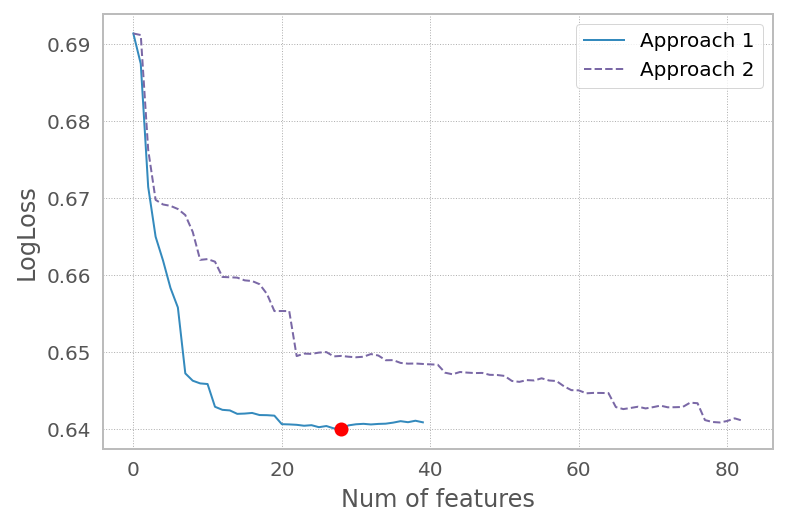

In [31]:
plt.plot(ll_shap, label="Approach 1")
plt.plot(ll_vif, label="Approach 2",linestyle="dashed")
plt.plot(ll_shap.index(min(ll_shap)),min(ll_shap), marker="o",color="r")
plt.legend()
# plt.title("Speed of convergence by different appraches")
plt.xlabel("Num of features")
plt.ylabel("LogLoss");